# Categorical Data

Categorical data consider numerical values (_i.e._ a quantitative variable) in the context of a category (_i.e._ a qualitative variable).

Surveys, like the ones we see on the television show Family Feud or the frequency of people with various eye colors, are examples of categorical data. 

In this chapter, there are two types of categorical data that we consider: ordinal data and nominal data. 

**Ordinal data** consists of data that can be described as having a meaningful order, ranking, or relationship between categories. An inventory that quantifies the number of small, medium, and large shirts in stock is an example of ordinal data because there is a ranked relationship between shirt sizes.

**Nominal data** can be described as named categories that have no meaningful relationship to one another. Counting the number of people with black, brunette, red, and blonde hair colors in a room is an example of nominal data because hair color has no inherit meaning amongst each other - one hair color is not greater than or less than the others.


Categorical data can be visualized using bar graphs, box and whisker plots, and pie charts, and in this section, we will practice making such visualizations.

Let's load the necessary libraries and read in the data.

In [81]:
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt

sns.set_style('whitegrid')

NorthAmerica_Military_USD_PercentGDP_Combined_csv = '''\
Year,CAN-PercentGDP,MEX-PercentGDP,USA-PercentGDP,CAN-USD,MEX-USD,USA-USD
1960,4.18525654,0.673508659,8.993124587,1.702442711,0.084,47.34655267
1961,4.128312243,0.651780326,9.1560315,1.677820881,0.0864,49.87977061
1962,3.999216389,0.689655172,9.331672945,1.671313753,0.0992,54.65094261
1963,3.620650112,0.718685832,8.831891186,1.610091701,0.112,54.56121578
1964,3.402062837,0.677506775,8.051281106,1.657457283,0.12,53.43232706
1965,2.930260659,0.591269841,7.587247177,1.57470454,0.1192,54.56179126
1966,2.683282422,0.576379066,8.435300286,1.614422827,0.1304,66.44275153
1967,2.74792677,0.545217107,9.417795933,1.775500366,0.1336,78.39844224
1968,2.54364188,0.548510764,9.268454275,1.797265817,0.1488,84.32903122
1969,2.27378467,0.600160043,8.633263795,1.770108751,0.18,84.99016543
1970,2.188979696,0.497411659,8.032743584,1.889157918,0.1768,83.407993
1971,2.131485639,0.48765558,6.943069609,2.077659711,0.1912,78.23797989
1972,2.011818438,0.536568089,6.519756924,2.233737031,0.2424,80.70807097
1973,1.832601818,0.544217687,5.893870591,2.363060955,0.3008,81.46979441
1974,1.783813085,0.565744137,5.954111197,2.809465529,0.4072,89.27892034
1975,1.863541853,0.57358422,5.622679096,3.18091549,0.5048,92.08092875
1976,1.765927978,0.598103574,5.191071429,3.581805735,0.531576968,94.71525108
1977,1.8057636,0.534256205,5.155617351,3.752174526,0.437692986,104.665219
1978,1.848887401,0.504834431,4.943087248,3.969158477,0.518287193,113.3820637
1979,1.711245918,0.505297474,4.951991535,4.084145738,0.679663588,126.8799271
1980,1.764448615,0.416107383,5.153537467,4.744402251,0.810422204,143.6883549
1981,1.709915638,0.513301014,5.646541256,5.141128191,1.284948561,176.5588753
1982,1.954343585,0.495419418,6.814057094,6.017321456,0.858130163,221.6735426
1983,2.081196249,0.522866314,6.32114426,6.947104072,0.778556797,223.427165
1984,2.117188855,0.65981906,6.23641653,7.349795764,1.155945373,245.1491683
1985,2.097376234,0.676313139,6.453219205,7.460563318,1.241863652,272.1632293
1986,2.109197118,0.634622463,6.626522658,7.78013674,0.817296612,295.5462238
1987,2.062576371,0.580341889,6.420274023,8.694447168,0.813391574,304.0866487
1988,1.986767119,0.536145374,6.071277702,9.897335684,0.981914646,309.6612693
1989,1.934614309,0.517255829,5.871206008,10.74713469,1.153375828,321.8665588
1990,1.958793742,0.433081035,5.605175294,11.41463185,1.210872502,325.129314
1991,1.895444339,0.435402301,4.883429398,11.3385033,1.459136041,299.3727791
1992,1.8616877,0.469454656,4.970466808,10.78880312,1.824550066,325.033736
1993,1.821753504,0.442785494,4.604350295,10.26882262,2.122980338,316.7194437
1994,1.696680257,0.518830327,4.215264675,9.57737764,2.635284079,308.084
1995,1.554090071,0.450891531,3.860245792,9.176903908,1.562615372,295.8530977
1996,1.403752581,0.476484778,3.554982206,8.615884471,1.882873103,287.9606687
1997,1.246243202,0.458095854,3.405562244,7.945140183,2.184061042,293.1678258
1998,1.256293902,0.450450487,3.201558499,7.748607984,2.263223453,290.9960551
1999,1.241703064,0.460988776,3.085676783,8.21077854,2.652912012,298.0948913
2000,1.11808088,0.44604782,3.112242147,8.299385231,3.031454509,320.0863242
2001,1.137368973,0.442657004,3.123809803,8.375571425,3.229469276,331.8056106
2002,1.120852292,0.421606002,3.447618099,8.495399281,3.172268734,378.4631388
2003,1.115878799,0.405916547,3.827161045,9.958245602,2.960496802,440.5320696
2004,1.107966027,0.364898723,4.016312736,11.33648983,2.854385965,492.9993762
2005,1.110669655,0.355958931,4.090034876,12.98813296,3.123454978,533.203
2006,1.125832408,0.311171936,4.041627237,14.8098928,3.035131019,558.335
2007,1.188901783,0.401163918,4.079655081,17.41713993,4.223037646,589.586
2008,1.248621382,0.390513227,4.463827356,19.3420584,4.334654124,656.756
2009,1.377555631,0.501556275,4.88559968,18.93622605,4.514233914,705.917
2010,1.194338338,0.452734493,4.922641677,19.31568883,4.789031339,738.005
2011,1.193291895,0.465777803,4.840173995,21.39372086,5.498458542,752.288
2012,1.118404598,0.475987281,4.477401219,20.45210711,5.717035575,725.205
2013,1.0023672,0.507919455,4.046678879,18.51573121,6.473144378,679.229
2014,0.989925299,0.513829957,3.69589465,17.85364048,6.758693845,647.789
2015,1.152709374,0.466676122,3.477845166,17.93764189,5.468837812,633.829639
2016,1.164161567,0.495064414,3.418942337,17.78277554,5.33687574,639.856443
2017,1.351602232,0.436510296,3.313381294,22.26969632,5.062076646,646.752927
2018,1.324681094,0.477517407,3.316248808,22.72932758,5.839521271,682.4914
2019,1.27894142,0.52348249,3.427080181,22.20440844,6.650808254,734.3441
2020,1.415055841,0.573651659,3.741160091,22.75484713,6.116376582,778.2322
'''

from io import StringIO

NorthAmerica_Military_USD_PercentGDP_Combined_file = StringIO(NorthAmerica_Military_USD_PercentGDP_Combined_csv)

military = pd.read_csv(NorthAmerica_Military_USD_PercentGDP_Combined_file, index_col='Year')

import warnings
warnings.filterwarnings('ignore')

## Bar graphs

Bar graphs are a popular method to visualize categorical data. They're simple, concise, and can condense
large and complex datasets into a visual summary. Most bar graphs depict a categorical element as an
independent variable on the x-axis while the height of the bar corresponds to a numerical variable on the y-axis.

We will practice making bar graphs using our military dataset in the context of an ordinal variable.

First, let's create a graph to examine the percent of the GDP (<u>G</u>ross <u>D</u>omestic <u>P</u>roduct) spent on the military in Canada. We will look at the years 2018, 2019 and 2020.

To do this, we must extract the data for the years of interest from the column containing the data pertaining to GDP percentage of military spending in Canada. We will call this `can_gdp`.


In [66]:
can_gdp = military.loc[[2018, 2019, 2020], ['CAN-PercentGDP']]

can_gdp

,CAN-PercentGDP
Year,
2018,1.324681
2019,1.278941
2020,1.415056


Next, we call `plt.bar()` to create a bar chart using this data. The `plt.bar()` function needs two arguments. The first argument, `x`, is an array of values to be plotted on the x-axis. 

The second argument, `height`, determines the height of the bars (the y-values). 

We will create a list of our years of interest and call it `year_labels` to input as the first argument and use the "CAN-PercentGDP" column of `can_gdp` as our second argument.

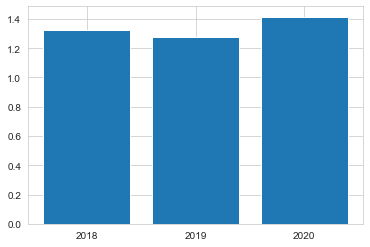

In [67]:
year_labels = ['2018', '2019', '2020']
plt.bar(year_labels, can_gdp["CAN-PercentGDP"])
plt.show()

The above code produced a plot, but this plot needs more descriptive labeling to help others understand the data. 

We need to add axis labels and a title to communicate what is being measured. Aesthetically, we can also reduce the width of each bar to give more room on the graph and more rest for our eyes.

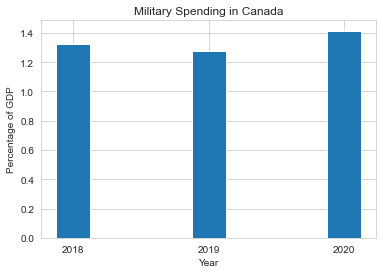

In [68]:
plt.bar(year_labels, can_gdp["CAN-PercentGDP"], width=0.25)


plt.title('Military Spending in Canada')

plt.ylabel('Percentage of GDP')
plt.xlabel('Year')

plt.show()

This plot looks better and is a lot more descriptive.

Let's add the data from Mexico and the United States.

To do this, we use the `plt.subplots()` function. This function creates a `figure` object and an `axis` object, which we will name `fig` and `ax`, respectively. More information on the workings of `plt.subplots()` is linked at the end of this section.

Using this function, we can add data for Canada, Mexico and the United States to the same plot, within the boundaries of the same axes. We do this by calling `ax.bar()`. Note that we want to group our bars by year. To do this we'll set precise positions on the x-axis.

We will also use `plt.tight_layout()` to automatically adjust the subplot dimensions to give appropriate spacing between the bars and the axes boundaries.

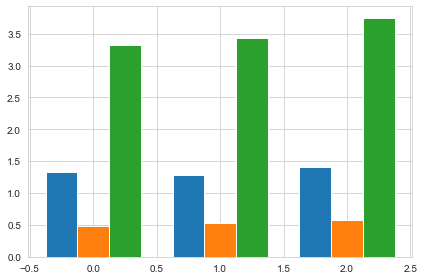

In [69]:
can_gdp = military.loc[[2018, 2019, 2020], ['CAN-PercentGDP']]
mex_gdp = military.loc[[2018, 2019, 2020], ['MEX-PercentGDP']]
usa_gdp = military.loc[[2018, 2019, 2020], ['USA-PercentGDP']]

index = np.arange(len(year_labels))

(fig, ax) = plt.subplots()

ax.bar(index - 0.25, can_gdp["CAN-PercentGDP"], width=0.25)

ax.bar(index, mex_gdp["MEX-PercentGDP"], width=0.25)

ax.bar(index + 0.25, usa_gdp["USA-PercentGDP"], width=0.25)

plt.tight_layout()

plt.show()

We were able to create a bar plot with all three data sets together. Now, let's add the appropriate titles, axis labels, and other details.

To add a title to the entire graph, we can call the `plt.title()` function, just as we did before.

In a subplot, to add axis labels, we have to use the `set_xlabel()` and `set_ylabel()` methods on the axis object, here `ax`.

We can also label each individual bar with the associated numerical value by calling the `bar_label()` method on `ax`. In order to label the bars, the label must be specified when creating each each bar.

The location of the legend within the subplot will be set using `ax.legend()`. The y-axis limits are set using `plt.ylim()`.

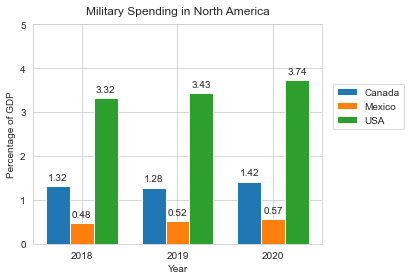

In [70]:
(fig, ax) = plt.subplots()

# round(decimals=2): rounds to 2 places after decimal

can_bar = ax.bar(index - 0.25, can_gdp["CAN-PercentGDP"].round(decimals=2), width=0.25, label='Canada') 
mex_bar = ax.bar(index, mex_gdp["MEX-PercentGDP"].round(decimals=2), width=0.25, label='Mexico')
usa_bar = ax.bar(index + 0.25, usa_gdp["USA-PercentGDP"].round(decimals=2), width=0.25, label='USA')

# Add labels, title, custom x-axis tick labels, etc.

plt.title("Military Spending in North America", pad=10)

ax.set_ylabel('Percentage of GDP')
ax.set_xlabel('Year')

ax.set_xticks(index, year_labels)

ax.bar_label(can_bar, label_type="edge", padding=4)
ax.bar_label(mex_bar, label_type="edge", padding=4)
ax.bar_label(usa_bar, label_type="edge", padding=4)

ax.legend(loc=4, bbox_to_anchor=(1.3, 0.5))

plt.ylim(0, 5)

plt.tight_layout()

plt.show()

Great! Now we have a well annotated, visually appealing graph that depicts an important message about the data: the percentage of the GDP spent on the military for each country for the years 2018-2020.

From this graph, we can easily see that during this time period, Canada and Mexico contribute a smaller proportion of their GDP to military spending than the United States. This may not have been easily discernable by just looking at our large data table.

## Box and whisker plots

Box and whisker plots are another visualization method for displaying categorical data that is often used in the social sciences and biological sciences.

Box and whisker plots are a useful data visualization method because they intrinsically display multiple summary statistics simultaneously. The central line of each box within a box and whisker plot is the *median*. The median (also known as the second quartile, $Q_2$) is a value within a dataset that lies within the middle, separating the higher half and the lower half of the dataset. The median is a valuable measure of center for a distribution because it is not greatly affected by outliers, as opposed to the *mean*.

Box and whisker plots also show the *lower quartile*, *the upper quartile*, the *interquartile range*, *outliers*, the *minimum*, and the *maximum*. The lower quartile $\left( Q_1\right)$ is the value where the lowest 25% of the data points within a distribution lie. It is represented by the lower end of the box. 

On the other side, the upper quartile $\left( Q_3\right)$ is the value in which the highest 25% of the data resides. It is represented by the higher end of a box.


The interquartile range (IQR), is the difference between the upper quartile and the lower quartile. The IQR is used to make the length of a box and is represented by the equation:

  > $IQR=Q_3-Q_1$
    

Outliers are data points that are less than $Q_1-1.5×IQR$ or greater than $Q_3+1.5×IQR$. These data points are shown beyond the extremity of the whiskers.

Lastly, the minimum and maximum values are represented by the lowest and highest values, respectively, <b>that are within the range $Q_1-1.5×IQR$ and $Q_3+1.5×IQR$</b>. Essentially, they are the lowest and highest values that <u>do not</u> qualify as outliers. The lower whisker represents the minimum value, while the upper whisker represents the maximum value.

Below is a pictorial summary of the major components of a box and whisker plot with an accompanying set of numbers, *A*:

![](./img/boxandwhisker.png)

We will use a box and whisker plot to examine the percentage GDP spending on the military for each country in the '60s as a way to examine nominal data.

First, we extract the data of interest:

In [71]:
the60s = military.loc[1960:1969, ['CAN-PercentGDP', 'MEX-PercentGDP', 'USA-PercentGDP']]

the60s

,CAN-PercentGDP,MEX-PercentGDP,USA-PercentGDP
Year,,,
1960,4.185257,0.673509,8.993125
1961,4.128312,0.651780,9.156031
1962,3.999216,0.689655,9.331673
1963,3.620650,0.718686,8.831891
1964,3.402063,0.677507,8.051281
1965,2.930261,0.591270,7.587247
1966,2.683282,0.576379,8.435300
1967,2.747927,0.545217,9.417796
1968,2.543642,0.548511,9.268454


Next, let's plot the data:

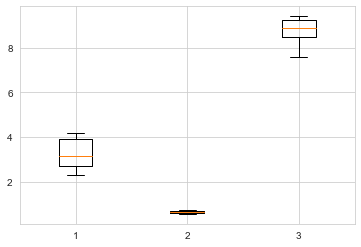

In [72]:
plt.boxplot(the60s);

If we plot this dataframe, the bare minimum graph plots the data within the columns of interest, but doesn't automatically use the column names as categorical indicators on the x-axis. This doesn't allow for easy interpretation of the data. 

Furthermore, while the current plot does the job of displaying the median and interquartile range, adding individual data points will allow for viewers to more easily see the spread of the data. The addition of axis labels, a title, and some color will also enhance this plot and make it more aesthetically pleasing. 

We can accomplish this using a combination of functions from `matplotlib` and `seaborn`:

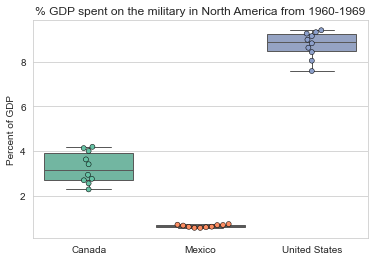

In [80]:
ax = sns.boxplot(data=the60s, palette="Set2", linewidth=1)
ax = sns.swarmplot(data=the60s, palette="Set2", linewidth=0.5, edgecolor = "black")
plt.xticks(ticks = [0,1,2], labels = ['Canada', 'Mexico', 'United States'])
plt.ylabel("Percent of GDP")
plt.title("% GDP spent on the military in North America from 1960-1969")


plt.show()

Now that we have proper labeling, we can see the median, upper quartile, and lower quartile of the percentage of the each country's GDP spent on the military. A noticeable observation this plot shows is that Mexico not only spent a small percentage of their GDP on the military (less than 2%), but the percentage of spending during this decade had very little variability. This makes it hard to see what the median, upper quartile, and lower quartile are for Mexico. The issue of being able to visually resolve displays of data is a common one that data scientists encounter. In the next section, we will offer one potential solution for this.

## Pie charts

Pie charts are a commonly used visualization method to represent proportions in datasets. Pie charts use *wedges* to represent the numerical value of a proportion corresponding to a categorial variable.

While pie charts are very common and can be easily interpreted by a layperson audience, they may not be the best way to represent data in certain cases. Firstly, because pie charts use the area of a circle to represent the proportion of a categorical variable, it can be difficult to gauge the numerical value that a wedge represents if the area doesn't appear as an easily discernible fraction (_e.g._ ½, ⅓, ¼). This can be aided with the help of labels and legends that explicitly show the numerical values associated with the wedges of the pie chart. Secondly, if you want to visualize many categorical variables or variables that make up a significantly small proportion of the dataset, it may be difficult to see the variable on a pie chart. Overall, pie charts can be a simple and effective way to communicate proportional categorical data, but before using them, consider what attributes of the data need to be highlighted to help decide if a pie chart is the most appropriate visualization method. 

Now, let's look at the total amount of money spent on the military in the entire North American continent for the year of 2000 and determine what proportion of this total amount came from each country. Because we are looking at a single year (2000), a pie chart is a good way to visualize the proportions of military spending contributed by each country. To do this, we will extract data for the year 2000; we'll call it `usd_2000`. Then, we will  make a pie chart using the `plt.pie()` function. We will use `usd_2000` to determine the wedge sizes and the argument `normalize=True` to normalize the data to 1. We'll also set the figure size, in inches, using `plt.figure()`.

In [74]:
usd_2000 = military.loc[2000, ['CAN-USD', 'MEX-USD', 'USA-USD']]

usd_2000

CAN-USD      8.299385
MEX-USD      3.031455
USA-USD    320.086324
Name: 2000, dtype: float64

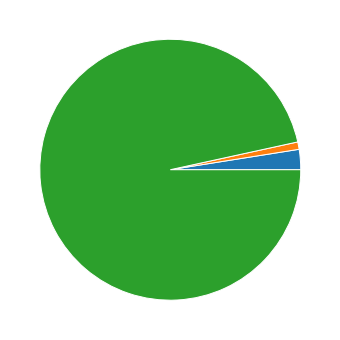

In [75]:
plt.figure(figsize=(10, 6))

plt.pie(usd_2000, normalize=True);

Now that we have a pie chart, let's add some more detail to it to make it more descriptive.

We can label the sectors of the chart so that we know which country corresponds to which color. Likewise, we can label the percentage of each sector to know the definitive proportion of each country's contribution to the total amount of money spent on the military in North America.

To do this, we will create a list called `countries`,  containing the strings "Canada", "Mexico", and "USA". We then assign the `labels` argument within `plt.pie()` to `countries` and add the `autopct` argument, which labels the wedges using the printf style format. More information on that format is linked at the end of this section.

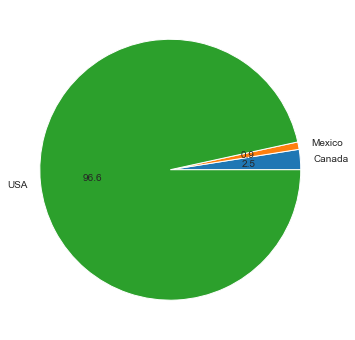

In [76]:
plt.figure(figsize=(10, 6))

countries = ['Canada', 'Mexico', 'USA']

plt.pie(usd_2000, normalize=True, labels=countries, autopct='%.1f')

plt.show()

This plot is okay, but it can be better.

Because the sectors of Mexico and Canada are a lot smaller than the sector for the United States, overlaying the percentages on top of the sector creates spatial issues that can be visually displeasing. Instead, let's add the percentages into a legend along with the labels of each sector. Let's also add a title so others can know what they are looking at when they view this chart.

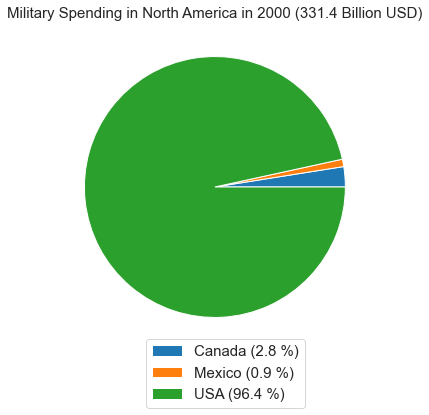

In [77]:
plt.figure(figsize=(10, 6))


patches, text = plt.pie(usd_2000, normalize = True)
labels = ['Canada (2.8 %)', 'Mexico (0.9 %)', 'USA (96.4 %)']
total = usd_2000.sum().round(decimals=1) #finds the sum of usd_2000 and rounds it to 1 position after the decimal

plt.legend(patches, labels, loc=4, bbox_to_anchor=(0.8, -0.2), fontsize=15)
plt.title("Military Spending in North America in 2000" + " (" + str(total) + " Billion USD)",  loc = 'center',
         fontsize = 15)


plt.show()

Above, we used `plt.pie()` in a way that we had not used it before.

Under the hood, the `plt.pie()` function returns two default outputs, which we named: `patches` and`text`. `patches` is an object that dictates the size of each wedge. `text` consists of a list of labels for our data. Here, we needed to specifically assign `patches` and `text` objects so we could use `patches` as an argument for the `plt.legend()` function. 

The `plt.legend()` function has two required arguments. The first argument dictates **what** is being labeled. In our case, the wedges of the pie chart (*i.e.* the `patches` object) are being labeled. The second argument dictates **how** things are labeled. Here, we simply created a variable called labels, which consists of the three strings:

In [79]:
labels

['Canada (2.8 %)', 'Mexico (0.9 %)', 'USA (96.4 %)']

The other arguments, `bbox_to_anchor` and `fontsize`, are optional when using the `plt.legend()` function.

The argument `bbox_to_anchor` designates the position in the plotting area where the legend will be, while the `fontsize` argument dictates the font size, in points, of the legend text.

## Conclusions

In this section, we were introduced to the `plt.bar()` and `plt.pie()` functions to construct bar plots and pie charts, respectively.

The `plt.bar()` function requires `x` and `height` arguments, which can be an array of number values, but other parameters can be included.

The use of the `plt.boxplot()` function allows us to make a basic box and whisker plot, but does not offer preferred labeling and coloring by default. The `sns.boxplot()` and `sns.swarmplot()` functions are good alternatives that have more customization and flexibility.

The `plt.pie()` function only requires an `x` argument as an array of values and has other arguments that can be included as well.

Both of these types of visualizations are used for depicting categorical data.

As a reminder, when deciding on whether to use a pie chart, consider certain attributes of the data, such as the number of categorical variables or the size of the proportions to be plotted. Below is a list of functions with linked documentation for your reference and further reading:

- <a target="_blank" href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html">plt.bar( )</a>
- <a target="_blank" href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html">plt.pie( )</a>
- <a target="_blank" href="https://matplotlib.org/stable/gallery/statistics/boxplot_demo.html">plt.boxplot( )</a> 
- <a target="_blank" href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html">plt.subplots( )</a>
- <a target="_blank" href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.title.html">plt.title( )</a>
- <a target="_blank" href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ylim.html">plt.ylim( )</a>
- <a target="_blank" href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlim.html">plt.xlim( )</a>
- <a target="_blank" href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ylabel.html">plt.ylabel( )</a>
- <a target="_blank" href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlabel.html">plt.xlabel( )</a>
- <a target="_blank" href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xticks.html">plt.xticks( )</a>
- <a target="_blank" href="https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.bar.html">ax.bar( )</a>
- <a target="_blank" href="https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.legend.html">ax.legend( )</a>
- <a target="_blank" href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.tight_layout.html">plt.tight_layout( )</a>
- <a target="_blank" href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html">plt.figure( )</a>
- <a target="_blank" href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.show.html">plt.show( )</a>
- <a target="_blank" href="https://seaborn.pydata.org/generated/seaborn.boxplot.html">sns.boxplot( )</a>
- <a target="_blank" href="https://seaborn.pydata.org/generated/seaborn.swarmplot.html">sns.swarmplot( )</a>
- <a target="_blank" href="https://docs.python.org/3/tutorial/inputoutput.html#formatted-string-literals">Formatted String Literals</a>